In [40]:
from custom_preprocessors import OneHotEncoderForMultiStrFeature, DateSplitter, DirectorsAgeTransformer, ContinuationFinder
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer, RobustScaler, StandardScaler

ImportError: cannot import name 'ContinuationFinder' from 'custom_preprocessors' (c:\Users\szlin\Desktop\Programowanie\WUM\PROJEKT 2\custom_preprocessors.py)

In [22]:
def drop_rows(df):
    return df.loc[(df["director_name"] != "-") & 
                  (df["director_professions"] != "-") & 
                  (df["director_birthYear"] != "\\N"), :]


def get_non_numeric_features_transformer():
    COLS_TO_DROP = ['movie_numerOfVotes',
                    'movie_averageRating', 
                    'Domestic gross $'
                    ]
    return ColumnTransformer(
        transformers= [
            ("genres_OHE", OneHotEncoderForMultiStrFeature("genres",skip_values=["\\N","News"]), ["genres"]),
            ("director_professions_OHE", OneHotEncoderForMultiStrFeature("director_professions", skip_values=['casting_director', 'make_up_department']), ["director_professions"]),
            ("production_date_split", DateSplitter(), ["production_date"]),
            ("directors_age", DirectorsAgeTransformer(), ["director_birthYear", "director_deathYear", "production_date"]),
            ('director_code', DirectorEncoder(), ['director_name']),
            ('is_continuation', ContinuationFinder(), ['movie_title']),
            ("drop_columns", 'drop', COLS_TO_DROP)
        ],
        remainder= "passthrough"
    )

def get_numeric_features_transformer():
    return ColumnTransformer(
        transformers= [
            ("WW_gross_$_box_cox", PowerTransformer(method="box-cox"), ['Worldwide gross $']),
            ('Production_budget', PowerTransformer(method="box-cox"), ['Production budget $']), #na pałę narazie
            ("runtime_minutes_Robust", RobustScaler(), ["runtime_minutes"]),
            ("approval_index", StandardScaler(), ["approval_Index"])
        ],
        remainder = "passthrough"
    )

def get_features_transformer():
    for_non_numeric = ['movie_numerOfVotes',
                    'movie_averageRating', 
                    'Domestic gross $', 
                    'Production budget $', 
                    "movie_title", 
                    'director_name',
                    "genres",
                    "director_professions",
                    "production_date",
                    "director_birthYear", "director_deathYear"]
    for_numeric = ['Worldwide gross $',"runtime_minutes","approval_Index"]

    return ColumnTransformer(
        transformers= [ 
            ("non_numeric",  get_non_numeric_features_transformer(), for_non_numeric),
            ("numeric", get_numeric_features_transformer(), for_numeric)
        ]
    )


In [23]:
df = pd.read_csv("data/movie_statistic_dataset.csv")


In [24]:
df = drop_rows(df)

In [25]:
transformer = get_features_transformer()
X = transformer.fit_transform(df)

NameError: name 'DirectorEncoder' is not defined

In [5]:
type(X)

numpy.ndarray

In [6]:
transformer.get_feature_names_out().shape

(59,)

In [7]:
X.shape

(3490, 59)

In [8]:
df_transformed = pd.DataFrame(X)

In [9]:
df_transformed.head()

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,2022.0,12.0,68.0,0.0,3.277229,3.458333,1.435311
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2011.0,5.0,51.0,0.0,2.435777,1.166667,0.829826
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,2015.0,4.0,51.0,0.0,2.736787,1.333333,1.552652
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,2017.0,11.0,51.0,0.0,1.979166,0.458333,0.404048
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2015.0,10.0,50.0,0.0,2.261594,1.625000,0.909311


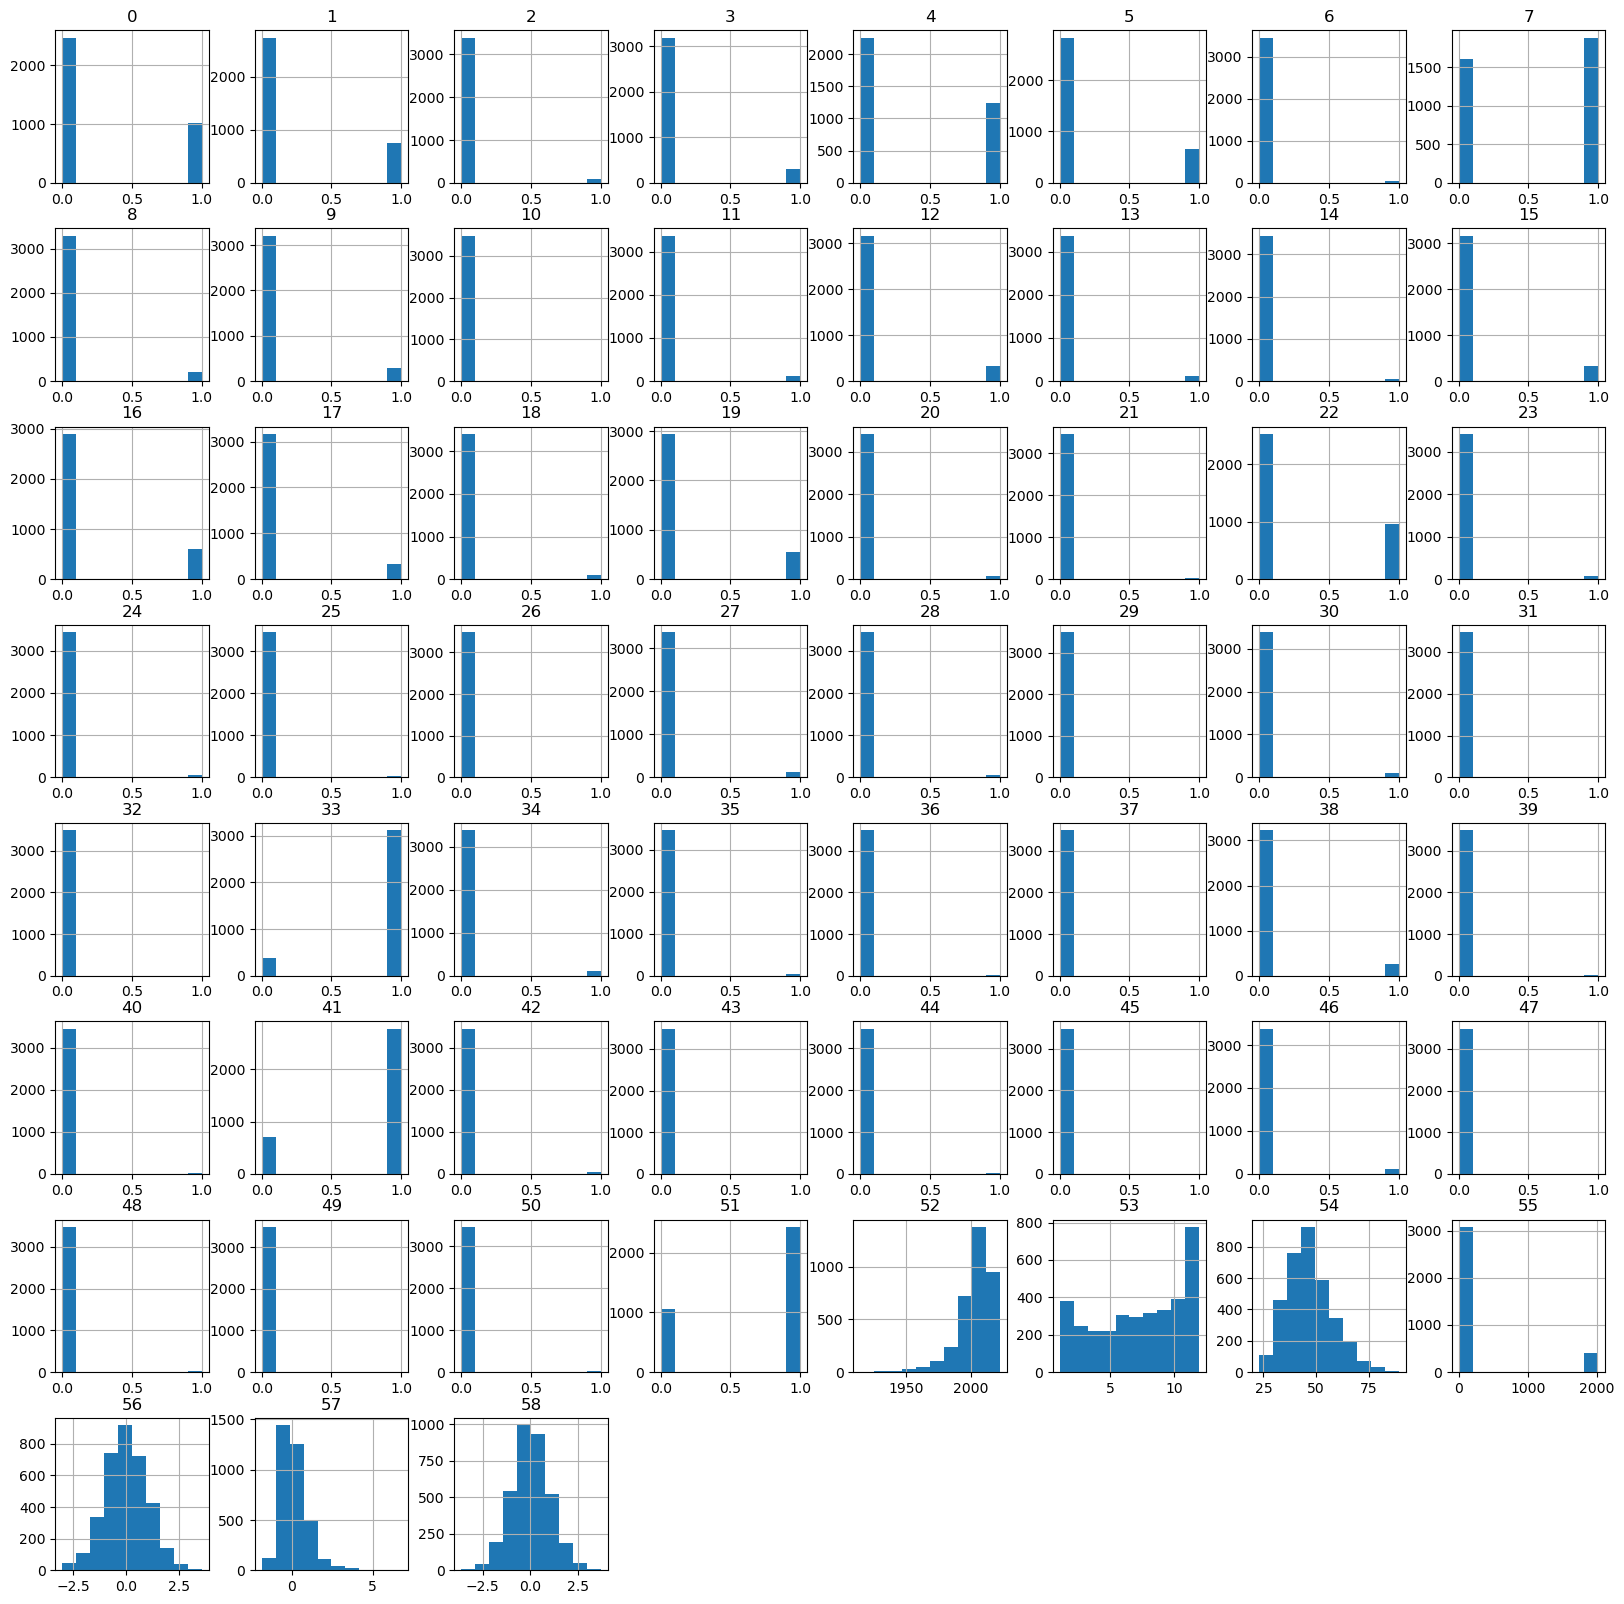

In [10]:
df_transformed.hist(figsize=(20,20))
plt.show()

In [11]:
colnames = transformer.get_feature_names_out()

In [12]:
colnames[-6]

'non_numeric__production_date_split__production_month'